In [1]:
import os

path = "data/"

os.chdir(path)

if os.curdir != path:
    print("Error: Could not change directory to " + path)
    exit(1)

if os.curdir == path:
    print("Success: Changed directory to " + path)
    exit(1)
    
print(os.getcwd())

Error: Could not change directory to data/
c:\GitHub\Metabolic-network-layout-using-biochemical-coordinates\Notebooks\data


In [133]:
import pandas as pd


Pathway = "core"
x_coord = "ExactMolWt"
y_coord = "MolLogP"

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")
# hubs = pd.read_csv("iML1515_hubs_descriptors.csv") #change this manually between core and 1515

hubs = pd.read_csv("e_coli_core_hubs_descriptors.csv") #change this manually between core and 1515


ExactMolWt_MolLogP


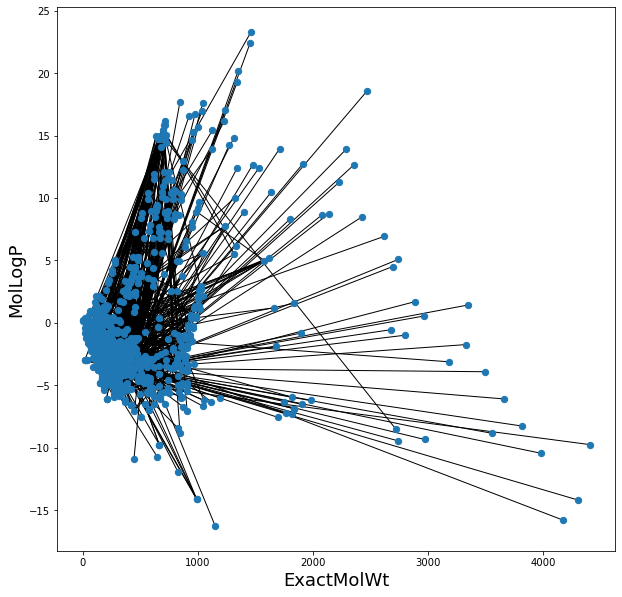

In [97]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()


#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv(f"{Pathway}.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv(f"{Pathway}_targets.csv")

# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)


file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)




# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))


pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)




nx.draw(net2,pos_net1,node_size =40, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

# nx.draw(net3,pos_net2,node_color = "b", node_size = 400,font_size = 40, with_labels = False, arrows = True, ax = ax)
# nx.draw_networkx_labels(net3, pos_net3_higher, font_size =15)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")
plt.show()


# Plotting of hubs

ExactMolWt_MolLogP


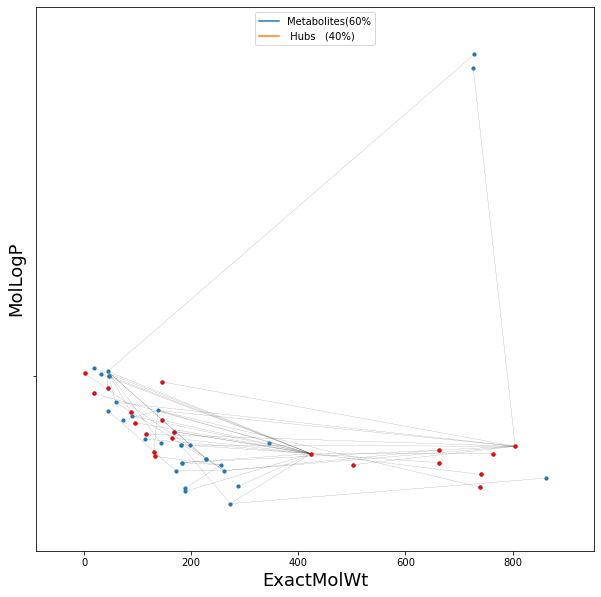

In [137]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()
net3 = nx.DiGraph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv(f"{Pathway}.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv(f"{Pathway}_targets.csv")

# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values
DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]
 

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

hub_sources = hubs["BiGG"]
hub_coordinates = hubs[[x_coord, y_coord]].values

net_data = zip(hub_sources, hub_coordinates) # targets

for e in net_data:
    src = e[0]
    c = e[1]

    net3.add_node(src, pos = c)

pos_net2 = nx.get_node_attributes(net3,'pos')


file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)





# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))


pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)

# color_map =[]
# for node in net2:
  #  if node in hubs["BiGG"]:
   #     color_map.append("blue")
    # else:
      #  color_map.append("r")

# color_map = ["cyan" if node in hubs_list else "red" for node in net2.nodes()]

# node_si = [40 if node in hubs_list else 10 for node in net2.nodes()]

# ax.plot('', label='Metabolites(78%') #1515
# ax.plot('', label=' Hubs   (22%)') #1515

ax.plot('', label='Metabolites(60%') #core
ax.plot('', label=' Hubs   (40%)') # core

ax.legend(loc = "upper center")

net2.nodes
nx.draw(net2,pos_net1,node_size = 10,  with_labels = False, width =0.1, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

nx.draw(net3,pos_net2,node_color = "r", node_size = 10,font_size = 40, with_labels = False, arrows = True, ax = ax)
# nx.draw_networkx_labels(net3, pos_net3_higher, font_size =15)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# plt.colorbar(x_coord)


print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/HUBS_{file_name}.png", format="PNG")
plt.show()


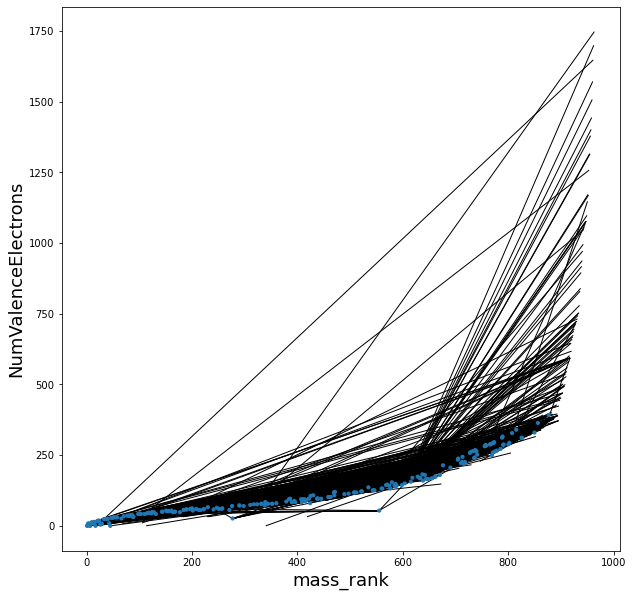

In [53]:

import matplotlib

fig, ax = plt.subplots(figsize=(10,10))

G =nx.DiGraph()

carac = pd.read_csv("iML1515_hubs.csv")

sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    G.add_node(src, pos = c)
    G.add_edge(src,dst)


# Create graph object
# G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# G = nx.from_pandas_edgelist(data2, sources, targets)# create_using=nx.Graph())



# Make types into categories
carac = carac.set_index('BiGG')
carac = carac.reindex(G.nodes())

carac['val'] = pd.Categorical(carac['val'])
carac['val'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange'])

# Draw graph^
nx.draw(G,pos_net1,node_size =10, node_color = carac["val"], cmap=cmap, with_labels = False, arrows = False, ax = ax)
# nx.draw(G, with_labels=True, node_color=carac['val'], cmap=cmap)


limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

c:\Users\meide\.conda\envs\rdkit\lib\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


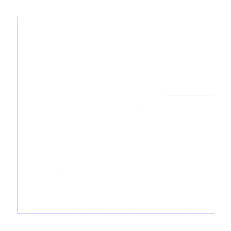

In [107]:
from nxviz import MatrixPlot

m = MatrixPlot(net2)

m


In [108]:
from nxviz import ArcPlot

In [113]:

a = ArcPlot(net2)
b = ArcPlot(net3)
a, b
plt.tight_layout()
plt.autoscale()

TypeError: __init__() takes 2 positional arguments but 3 were given

c:\Users\meide\.conda\envs\rdkit\lib\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


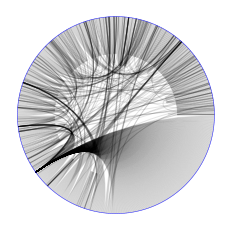

In [115]:
from nxviz import CircosPlot

c = CircosPlot(net2)
c

AttributeError: 'DiGraph' object has no attribute 'keys'

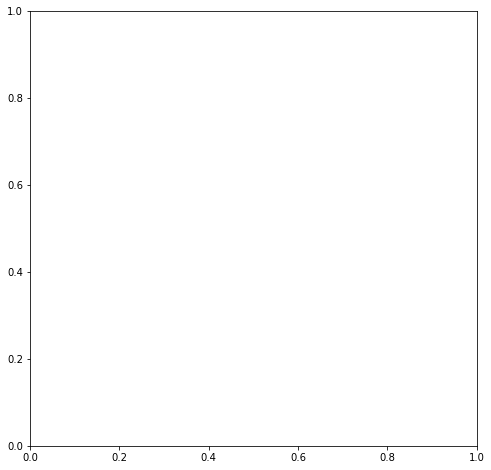

In [121]:
from hiveplot import HivePlot

nodes_cmap = {}
nodes_cmap['BiGG'] = 'dodgerblue'
nodes_cmap['target'] = 'tomato'



h = HivePlot(net3,edges = target["target"], node_colormap= nodes_cmap)
h